In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
train_data = pd.read_csv('../Python/Dataset/Age')
train_data.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


(4177, 9)
[1 2 3]
Sex
1    1528
2    1307
3    1342
dtype: int64


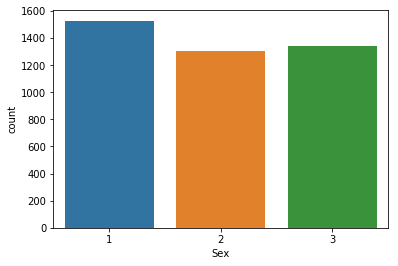

In [17]:
print(train_data.shape)
print(train_data['Sex'].unique())
print(train_data.groupby('Sex').size())
import seaborn as sns
sns.countplot(train_data['Sex'],label="Count")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

feature_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
X = train_data[feature_names]
y = train_data['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# logisitc regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.99


In [31]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [32]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
len(y_pred)

[[370   0   0]
 [316   0   0]
 [359   0   0]]


1045

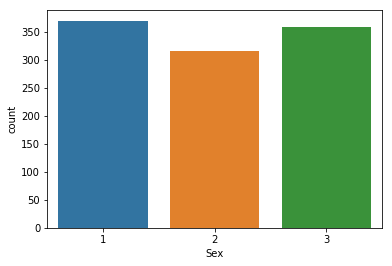

In [34]:
sns.countplot(y_test[:],label="Count")
plt.show()

In [9]:
#K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [10]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.55
Accuracy of LDA classifier on test set: 0.56


/home/jobin/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [11]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


In [35]:
#Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
#Initializing Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 9))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=9, units=6)`
  
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  


In [38]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
3132/3132 [==============================] - 1s 395us/step - loss: -4.0228 - acc: 0.3688
Epoch 2/100
3132/3132 [==============================] - 1s 236us/step - loss: -13.5377 - acc: 0.3697
Epoch 3/100
3132/3132 [==============================] - 1s 232us/step - loss: -14.9446 - acc: 0.3697
Epoch 4/100
3132/3132 [==============================] - 1s 245us/step - loss: -15.0498 - acc: 0.3697
Epoch 5/100
3132/3132 [==============================] - 1s 214us/step - loss: -15.0514 - acc: 0.3697
Epoch 6/100
3132/3132 [==============================] - 1s 261us/step - loss: -15.0516 - acc: 0.3697
Epoch 7/100
3132/3132 [==============================] - 1s 253us/step - loss: -15.0516 - acc: 0.3697
Epoch 8/100
3132/3132 [==============================] - 1s 278us/step - loss: -15.0516 - acc: 0.3697
Epoch 9/100
3132/3132 [==============================] - 1s 227us/step - loss: -15.0516 - acc: 0.3697
Epoch 10/100
3132/3132 [==============================] - 1s 211us/step - loss: -15

KeyboardInterrupt: 

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [40]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[370   0   0]
 [316   0   0]
 [359   0   0]]


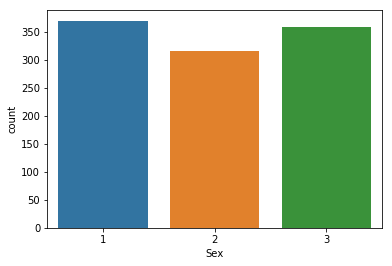

In [41]:
sns.countplot(y_test[:],label="Count")
plt.show()